In [79]:
#Loading data 
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [80]:

twenty_train.target_names #prints all the categories
print("\n".join(twenty_train.data[0].split("\n")[:3])) #prints first line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


# Transforming data 

In [81]:
#convert the text files into numerical feature vector and  extacting features for training data

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

In [82]:
#reduce the number of commont words (this it, then, is)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

In [83]:
twenty_train.target.shape, X_train_counts.shape

((11314,), (11314, 130107))

# Runninng ML 

In [84]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [85]:
#Predicting 
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)


In [86]:
predicted = text_clf.predict(twenty_test.data)


In [101]:
predicted.ravel().shape, twenty_test.target.ravel().shape

((7532,), (7532,))

In [87]:
np.mean(predicted == twenty_test.target)

0.7738980350504514

In [94]:
import matplotlib.pyplot as plt 

In [95]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


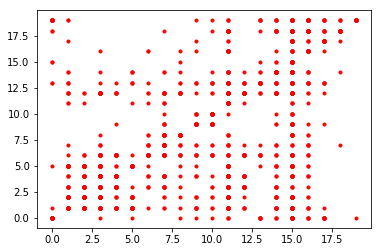

In [108]:
plt.plot(predicted.ravel(),twenty_test.target.ravel(),'.',c='r')

In [106]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                     ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, n_iter=5, random_state=42)),
 ])
_ = text_clf_svm.fit(twenty_train.data, twenty_train.target)
predicted_svm = text_clf_svm.predict(twenty_test.data)
np.mean(predicted_svm == twenty_test.target)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.8238183749336165

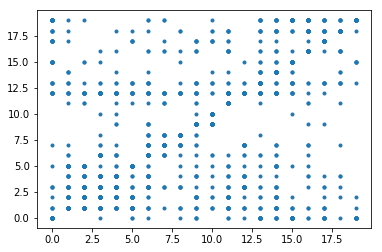

In [107]:
plt.plot(predicted_svm.ravel(),twenty_test.target.ravel(),'.')